<a href="https://colab.research.google.com/github/distantstar21/regression-project/blob/main/Regression%2BEDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

<h1>1 | Introduction</h1>

<p>When starting with data analysis, it's easy to jump straight into working with the dataset and applying familiar tools. However, this approach can lead to limited insights. It’s important to first establish a solid framework for thinking through the problem before diving in. But how do we build that structure?</p>

<p>The foundation of this structure lies in clearly defining the scope of the data problem. There are four key components to consider when outlining a project scope: understanding the context of the project, identifying the needs the project aims to address, envisioning what success will look like, and determining the desired outcomes.</p>

<h3>Context (Understanding who we’re working with and their objectives):</h3>
<p>For instance, an insurer may aim to develop optimal medical insurance products, plan specific outcomes, or manage large portfolios. In these scenarios, the main objective is to predict insurance costs with accuracy.</p>

<h3>Explanation of the Dataset Variables:</h3>
<ul>
    <li><strong>age:</strong> Age of the primary beneficiary.</li>
    <li><strong>sex:</strong> Gender of the insurance contractor (female or male).</li>
    <li><strong>bmi:</strong> Body Mass Index (BMI), a measure that provides insight into whether an individual's weight is high or low relative to their height. The ideal BMI is between 18.5 and 24.9.</li>
    <li><strong>children:</strong> Number of dependents covered by the health insurance.</li>
    <li><strong>smoker:</strong> Indicates whether the beneficiary is a smoker.</li>
    <li><strong>region:</strong> The residential area of the beneficiary in the US (northeast, southeast, southwest, northwest).</li>
    <li><strong>charges:</strong> Individual medical costs billed by health insurance.</li>
</ul>

<h3>Needs (Challenges that can be addressed with data):</h3>
<p>For example, can we enhance the financial performance of a medical insurer?</p>

<h3>Vision (What success looks like):</h3>
<p>The goal is to train a regression model that accurately predicts the <code>charges</code> column. Since this is a regression problem, we'll evaluate the model using metrics like the coefficient of determination (R²) and mean squared error (MSE).</p>

<h3>Outcome (What we expect after completing the work):</h3>
<p>By the end, the medical insurer should be able to better estimate the medical costs for each user, leading to more accurate pricing models. Ultimately, the final output should be straightforward yet effective, a result of thorough consideration of context, needs, vision, and outcomes. Simple, well-thought-out solutions are more likely to be implemented successfully.</p>


# <b>2 <span style ='color:#83BD75'>|</span> Importing Libraries</b>

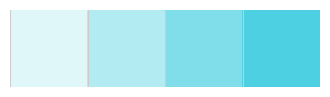

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
colors_nude = ['#E0F7FA', '#B2EBF2', '#80DEEA', '#4DD0E1']
sns.palplot(sns.color_palette(colors_nude))
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import  mean_squared_error ,r2_score , explained_variance_score
from time import time
from sklearn.model_selection import GridSearchCV , learning_curve

# <b>3 <span style ='color:#4E944F'>|</span> Loading the data</b>

In [4]:
df = pd.read_csv('/content/insurance.csv')
df['children'] =df['children'].astype('object')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, We do EDA for getting more insights into the nature of the data, understand various patterns and get some insights for performing data cleaning and modeling.

# <b>4 <span style ='color:#4E944F'>|</span> Exploratory Data Analysis</b>

I've always wondered how to explore data. Should I create random visualizations that only I understand? When I see others' notebooks, I think, "I can do that visualization, but why did they choose it?" If you have these questions, don't worry. I'll help you, and remind myself too.

- **First**, polished visualizations are great, but the exploration phase is crucial. It helps create visuals that stand out by closely examining the data.
- **Second**, structure your notebook to avoid impulsive decisions, understand what you want from the data, and prevent data overload.
- **Third**, don't start with a visual idea and then find data. Begin with the data and let the visualizations follow.
- **Fourth**, before you begin, pause and ask what you want to learn from the data. The more specific your question, the better your direction.
- **Fifth**, choose visualization methods that simplify information, making it understandable even to non-technical people. The value lies in clarity, not complexity.
- **Sixth**, after answering your question, you'll likely have more. Dig into those new questions to provide focus and purpose, especially when designing visuals for a broader audience.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | What Region Costs More ? </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

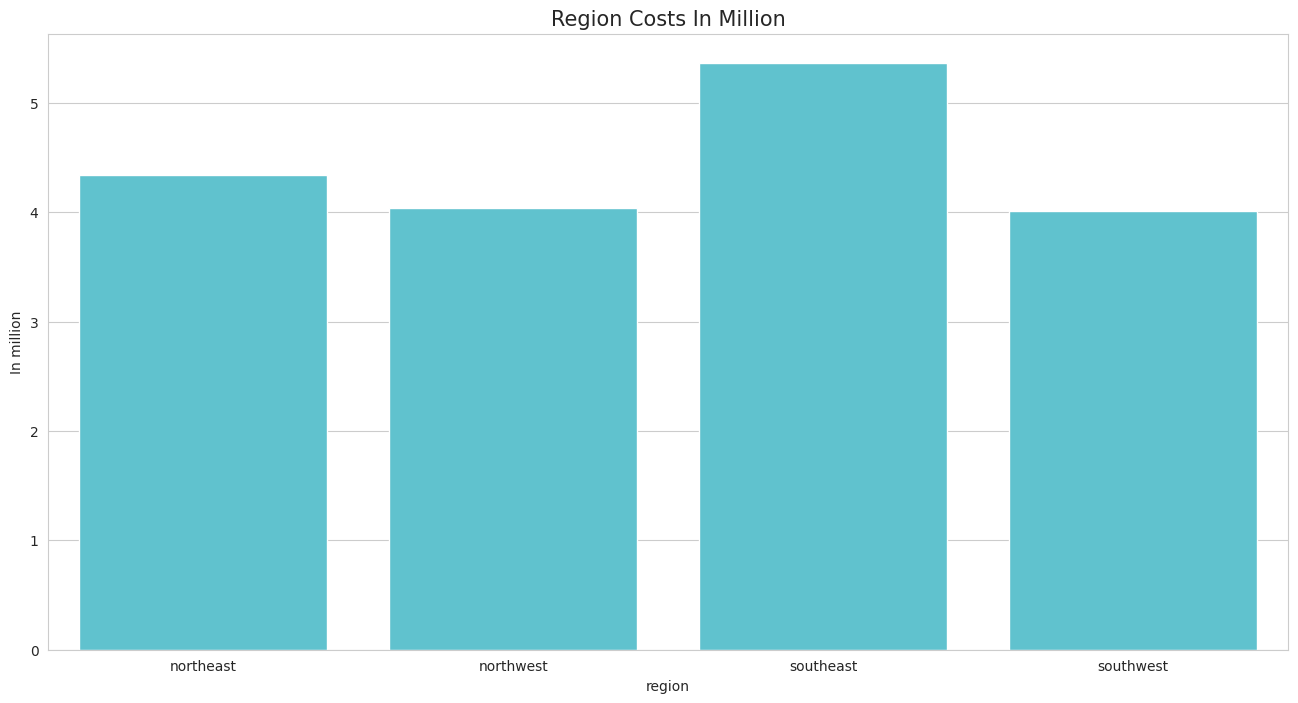

In [6]:
region_cost= df.groupby('region')['charges'].sum() * 1e-6
fig = plt.figure(figsize=(16,8))
sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
plt.title('Region Costs In Million', size=15)
plt.ylabel('In million')
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Dose Old Costs More ? </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

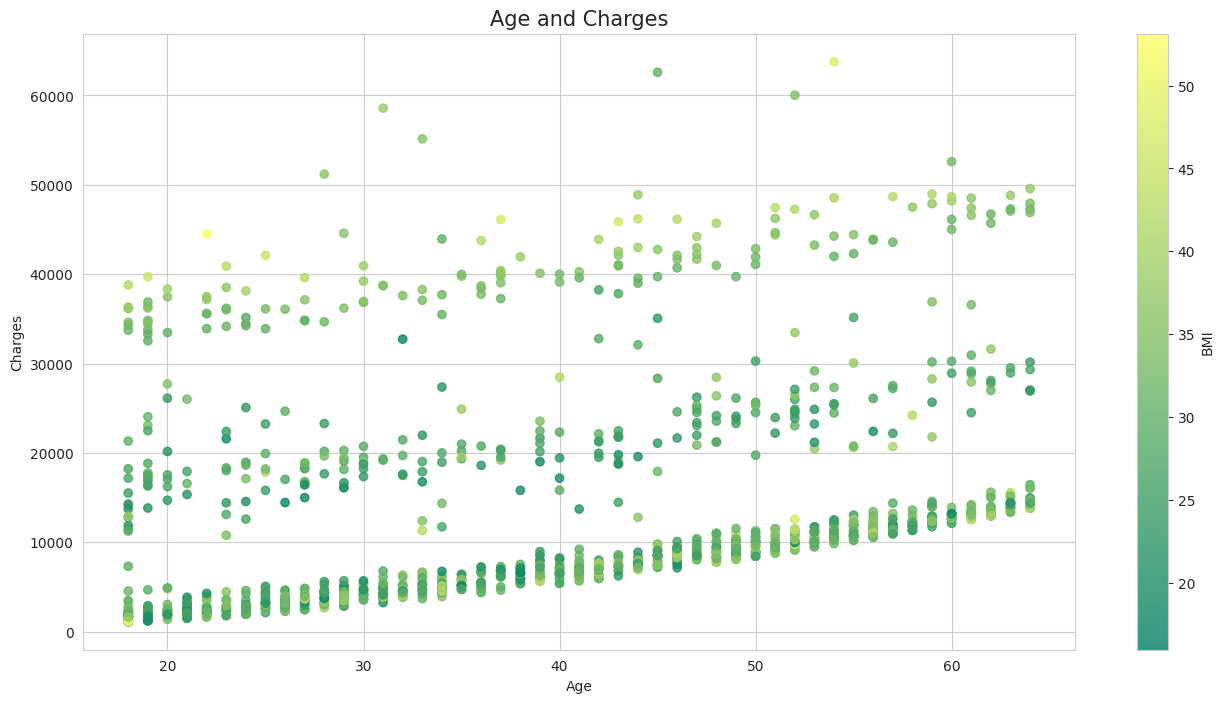

In [7]:
fig = plt.figure(figsize=(16,8))
plt.scatter(df['age'] , df['charges'], cmap = 'summer' ,c = df['bmi'] ,alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Charges')
plt.colorbar(label = 'BMI')
plt.title('Age and Charges',size = 15);

In [8]:
df[['charges' , 'age']].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


#### Insight
-  it seems that we have clustering data ( will do it at Feature Engineering ),but as that more age more charges
-  what it's like to have a bmi more than 50 ?
-  what is the charges that is more than 50,000$ ?


![](https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg?_=07167)

In [9]:
df.query('bmi > 50 ')['age']

,age
847,23
1047,22
1317,18


  having a BMI of more than 50 and you're less than 25 years old, I guess those are outliers

In [10]:
df.drop(df.query('bmi > 50 ').index ,axis= 0 ,inplace=True)
df.drop(df.query('charges > 50000 ').index  ,axis= 0 ,inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.3 | Which Gender Costs More ? </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

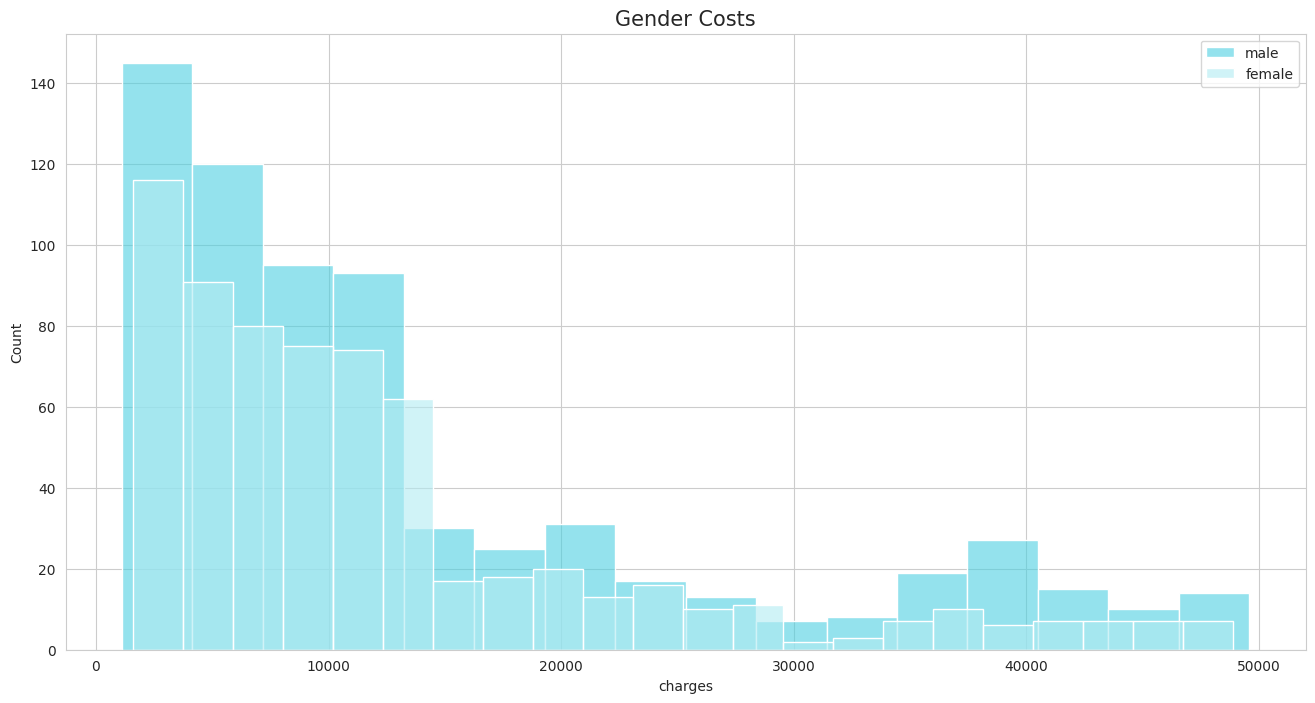

In [11]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data =df[df['sex'] =='male'] ,  x = 'charges' ,color = colors_nude[-1]  ,label = 'male' ,alpha = 0.6)
sns.histplot(data =df[df['sex'] =='female'] ,  x = 'charges',color = colors_nude[1] ,label = 'female' ,alpha = 0.6)
plt.title('Gender Costs',size = 15)
plt.legend()
plt.show()

#### Insight
-  it seems that men costs more than women


<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.4 | Does smoking Costs More ? </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

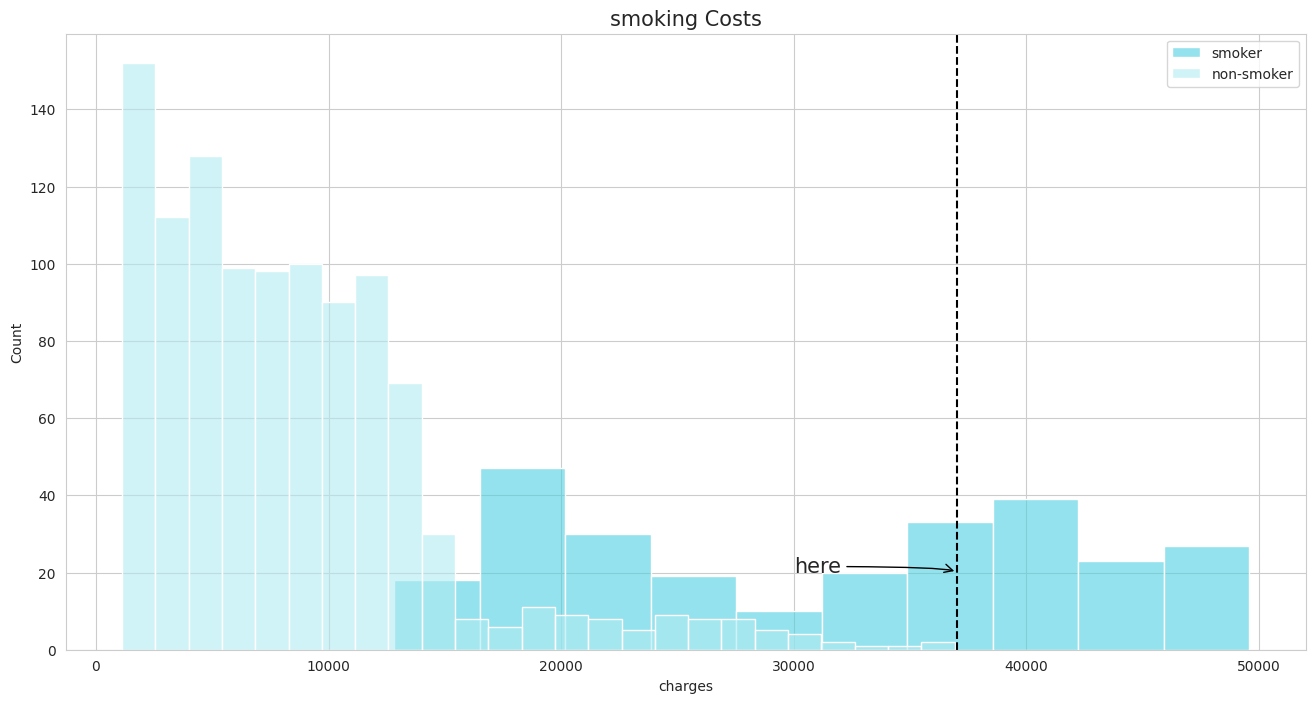

In [12]:
fig  ,ax= plt.subplots(figsize=(16,8))
sns.histplot(data =df[df['smoker'] =='yes'] ,  x = 'charges' ,color = colors_nude[-1]  ,label = 'smoker' ,alpha = 0.6)
sns.histplot(data =df[df['smoker'] =='no'] ,  x = 'charges',color = colors_nude[1] ,label = 'non-smoker' ,alpha = 0.6)
plt.title('smoking Costs',size = 15)
plt.axvline(37000, color="k", linestyle="--");
ax.annotate('here',size = 15, xy=(37000,20), xytext=(30000, 20),arrowprops=dict(arrowstyle="->"
                                                                              ,connectionstyle="angle3,angleA=0,angleB=-90"
                                                                             ,color = 'k'));
plt.legend()
plt.show()

#### Insight
  can you see that we have only charges more than 37,000$ for smoking people , so yes smoking affect the cost


# <b>5 <span style='color :#4E944F'>| </span>  Data Preprocessing</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.1 | Basic data cleaning</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [13]:
df.nunique()

,0
age,47
sex,2
bmi,542
children,6
smoker,2
region,4
charges,1327


In [14]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
df.drop_duplicates(inplace=True)
df.shape

(1327, 7)

  No missing data, that is bad

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.2 |  Assumptions of Regression
 </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px
            



* **Linearity ( Correct functional form )**
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity )**
* **Independence of Errors ( vs Autocorrelation )**
* **Multivariate Normality ( Normality of Errors )**
* **No or little Multicollinearity**

Since we fit a linear model, we assume that the relationship is **linear**, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the response(dependent) variable doesn't increase as the value of the predictor(independent) increases, which is the assumptions of equal variance, also known as **Homoscedasticity**. We also assume that the observations are independent of one another(**No Multicollinearity**), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

**Linearity(Correct functional form):**
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

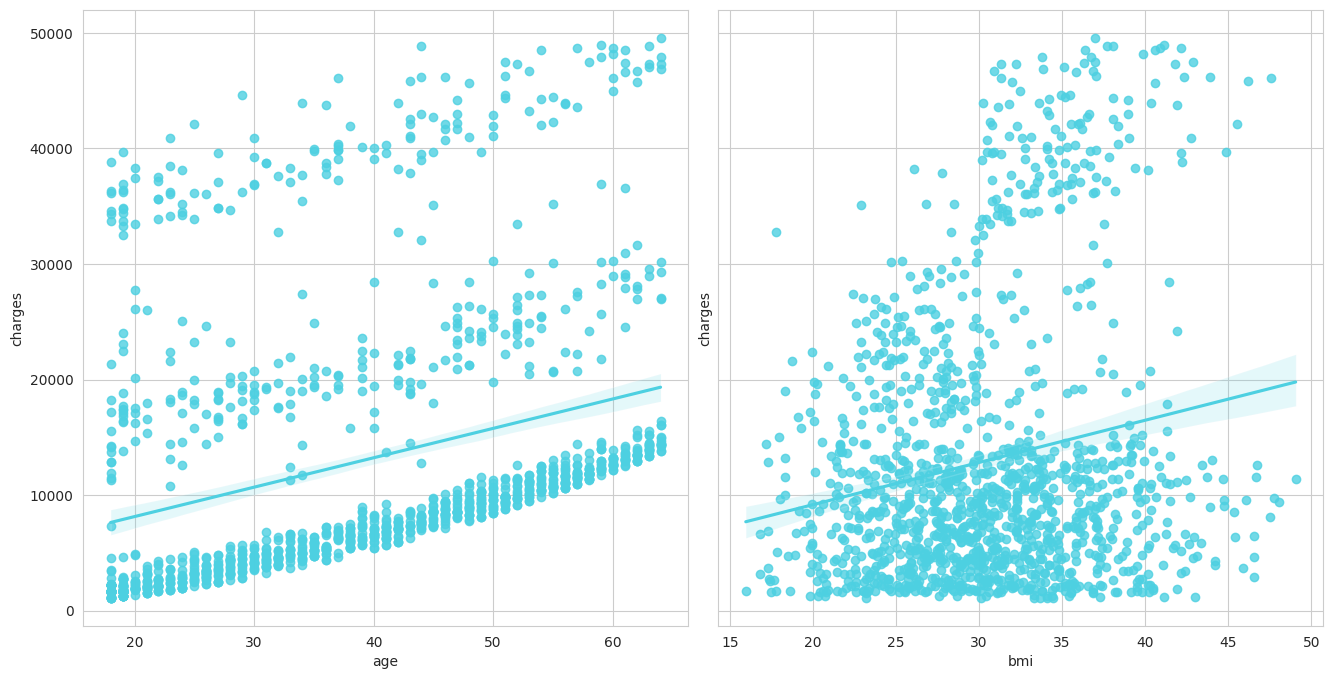

In [16]:
fig, ax = plt.subplots(1,2,figsize = (16,8),sharey=True )

fig.subplots_adjust(hspace=0.01, wspace=0.05)

sns.regplot(x=df.age, y=df.charges, ax=ax[0] ,color=colors_nude[-1])

sns.regplot(x=df.bmi, y=df.charges, ax=ax[1],color=colors_nude[-1]);

  what about residual (<b>Homoscedasticity</b>) ?

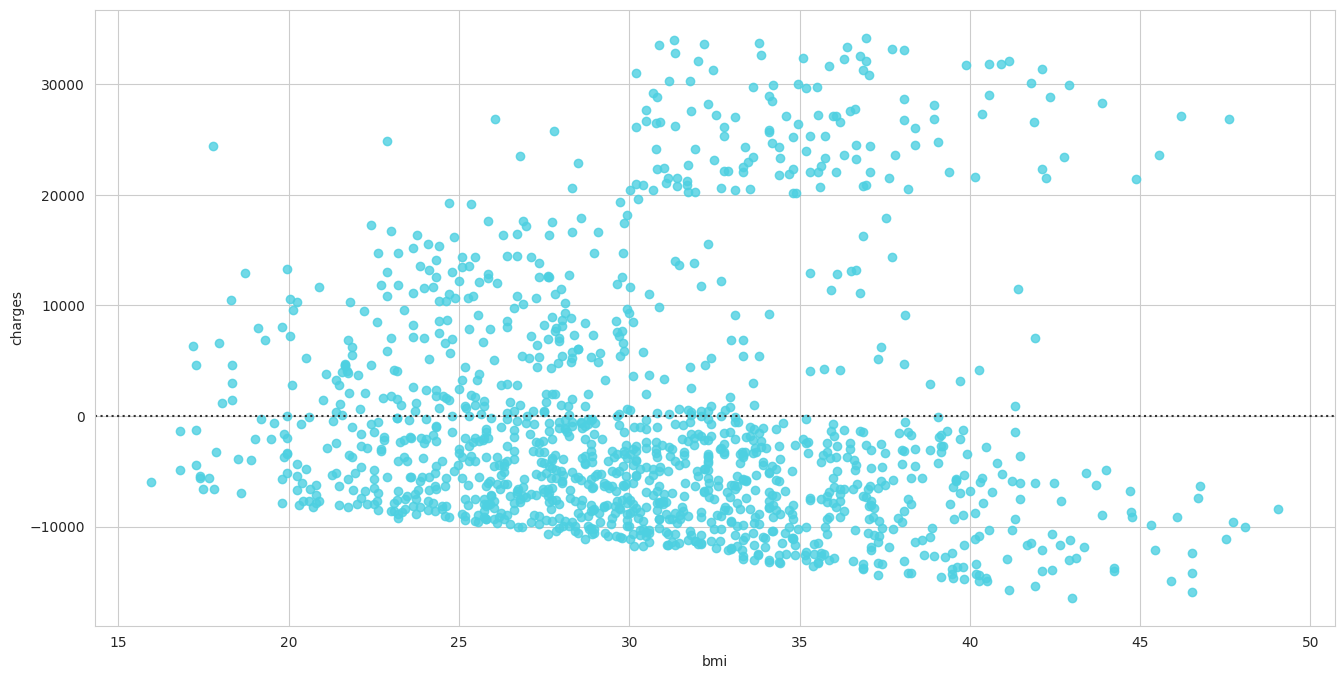

In [18]:
plt.subplots(figsize=(16,8))
sns.residplot(x=df.bmi, y=df.charges, color=colors_nude[-1])
plt.show()

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. The error plot shows that as **BMI** value increases, the variance also increases, which is the characteristics known as **Heteroscedasticity**. One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation. We will do that later.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.3 | Target Variable </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px
            


  charges is the variable we need to predict. So let's do some analysis on this variable first.




 mu = 13038.59 and sigma = 11668.32



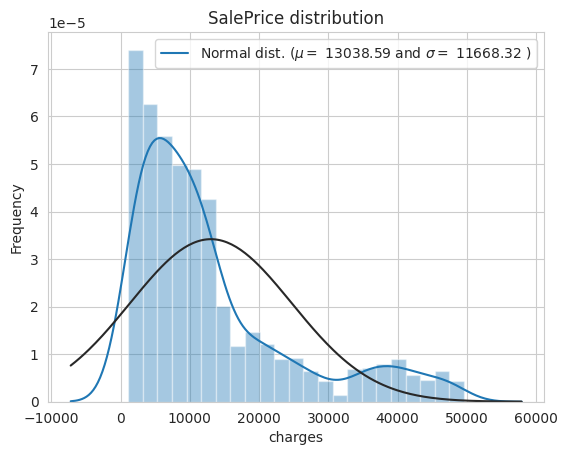

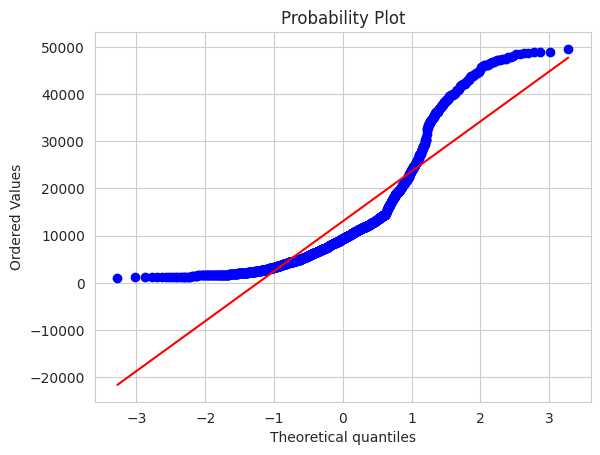

In [19]:
sns.distplot(df['charges'] , fit=norm);

(mu, sigma) = norm.fit(df['charges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['charges'], plot=plt)
plt.show()

  The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu = 9.09 and sigma = 0.91



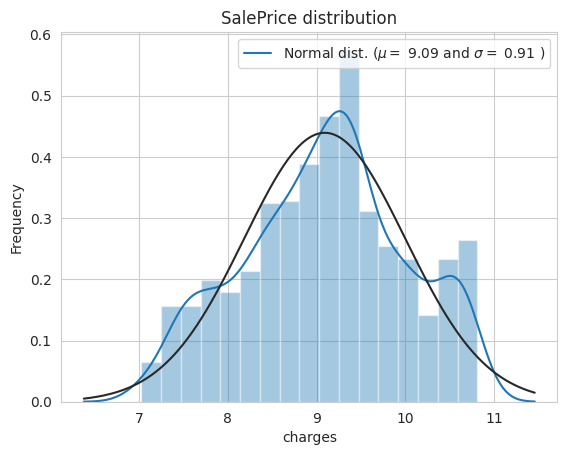

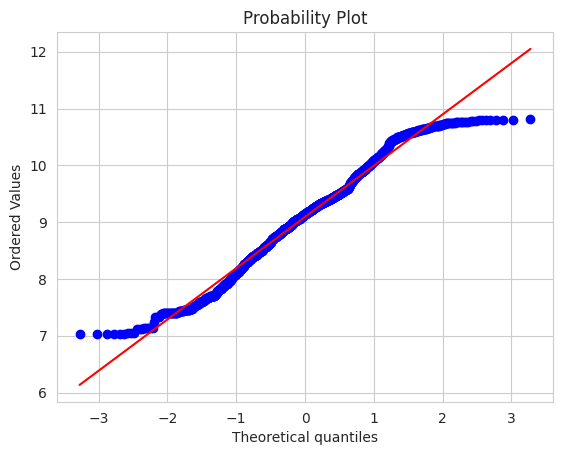

In [20]:
df['charges'] = np.log1p(df['charges'])
sns.distplot(df['charges'] , fit=norm );

(mu, sigma) = norm.fit(df['charges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['charges'], plot=plt )
plt.show()

 Let's see post-transformed state of residual plots.

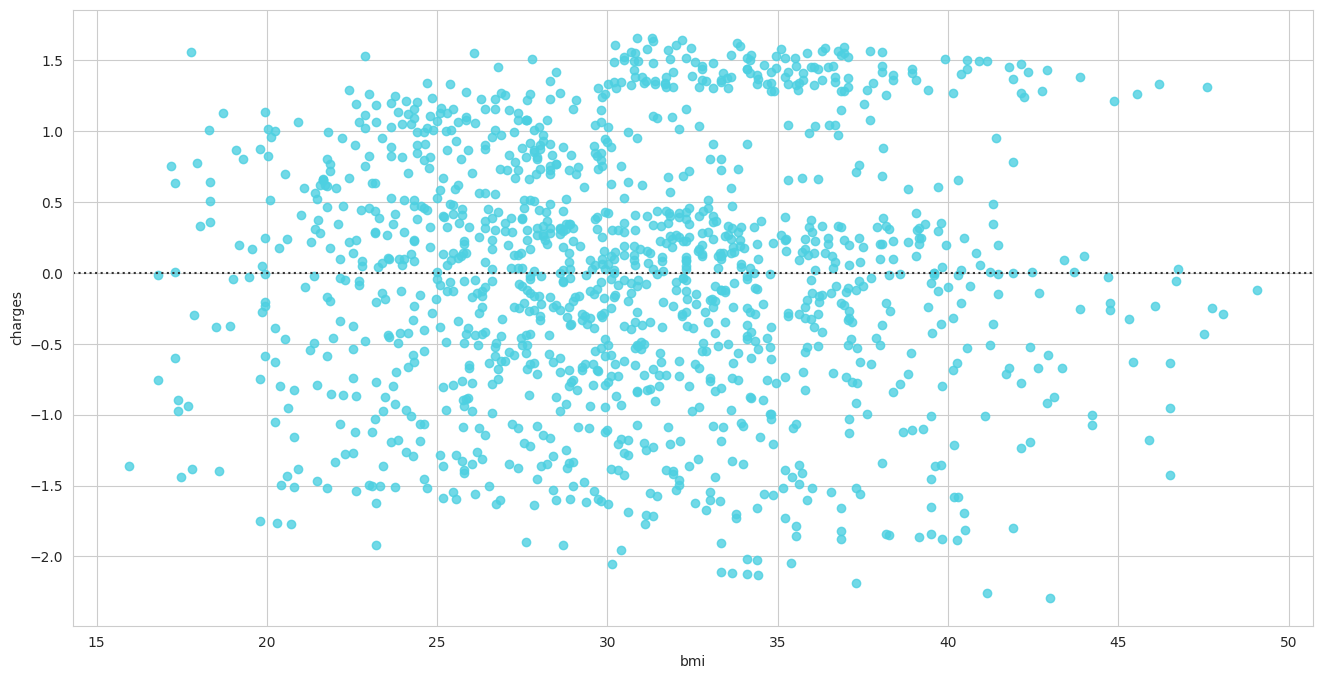

In [21]:
fig = plt.figure(figsize=(16,8))
sns.residplot(x = df.bmi, y = df.charges,color=colors_nude[-1]);

  Not bad ,Almost an equal amount of variance across the zero lines

<b> No or Little multicollinearity </b>: Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features.

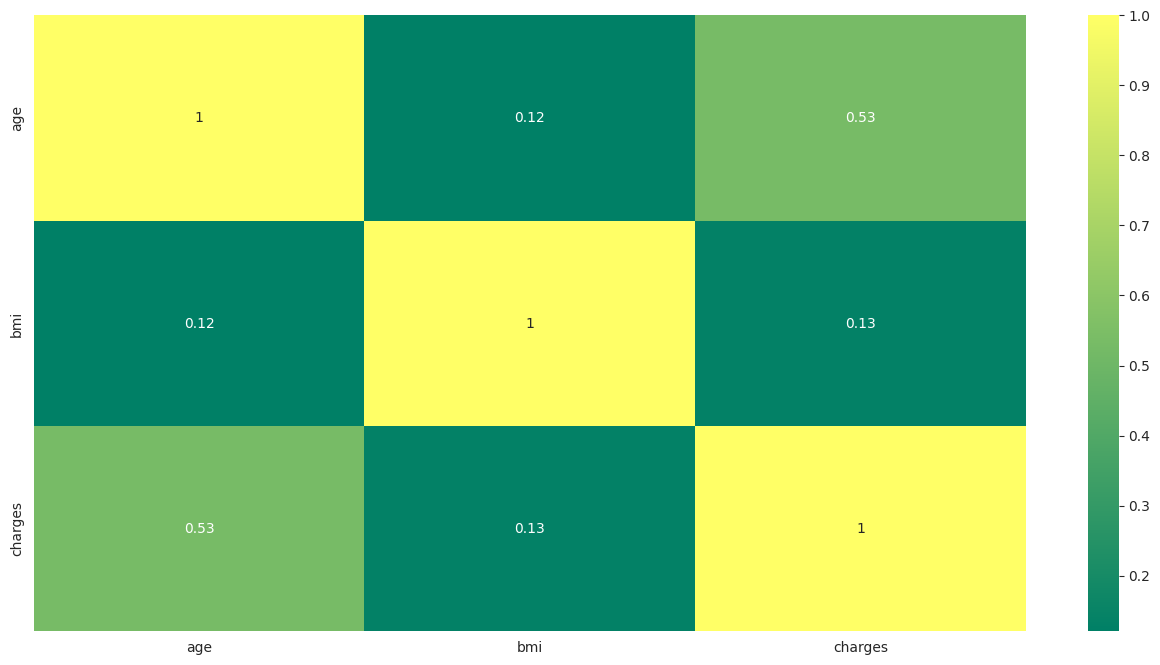

In [24]:
plt.figure(figsize=(16,8))
numeric_df = df.drop(columns=['sex']).select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='summer')
plt.show()
#sns.heatmap(df.corr() ,annot=True,cmap='summer')

 Little multicollinearity is acceptable  👍


# <b>6 <span style='color :#4E944F'>| </span> Feature Engineering</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.1 | Fixing Skewness </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px
            


In [25]:
numeric_col = df.dtypes[df.dtypes != 'object'].index
skewed_col = df[numeric_col].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_col

,0
bmi,0.216321
age,0.052763
charges,-0.104008


  more than 0.75 i will consider that skewed column ,so we don't have skewness

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.2 | Creating Features </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px
            

within this problem i want to share one method on creating feature

-  Polynomials

but first we need to split the data to check if these new variable doing a good job or not

In [26]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
cat_col = df.select_dtypes(include = 'object').columns
df = pd.get_dummies(df , cat_col ,drop_first=True)
y =df.pop('charges')
X_train, X_test, y_train, y_test = train_test_split( df , y , test_size=0.2 , random_state=True)

This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)
X_train_poly.shape

(1061, 454)

In [28]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_hat_train = lr2.predict(X_train)
print(f"R-Squared Score without PolynomialFeatures ': {r2_score(y_train, y_hat_train)}")

R-Squared Score without PolynomialFeatures ': 0.7683651933160439


In [29]:
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)
y_hat_train = lr2.predict(X_train_poly)
print(f"R-Squared Score with PolynomialFeatures': {r2_score(y_train, y_hat_train)}")

R-Squared Score with PolynomialFeatures': 0.8588104145133237


you now may ask is that won't increase the chance of overfitting , easy easy we will deal with that

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_poly = std_scaler.fit_transform(X_train_poly)
X_test_poly = std_scaler.transform(X_test_poly)

# <b>7 <span style='color :#4E944F'>| </span> Modeling</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.1 | Tuning the Regressors  </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px
            


because I always have a problem memorizing these hyperparameters and go get some from any blog I will force myself and write a
a small note of each parameter

In [31]:
from sklearn.linear_model import Lasso , Ridge ,ElasticNet
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [32]:
RD =Ridge()
RD_param_grid = {'alpha' : [  0.1, 0.12 , 1 ],
                 'solver':['svd']
                }
#alpha:controls how much you want to regularize the model
#kernel:trick makes it possible to get the same result as if you had added many polynomial features0
#gamma and C makes the bell-shaped curve narrower ,if your model is overfitting, you should reduce it
#degree:degree polynomial kernel
#coef0:how much the model is influenced by highdegree polynomials versus low-degree polynomials

gsRD = GridSearchCV(RD,param_grid = RD_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsRD.fit(X_train_poly, y_train)
RD_best = gsRD.best_estimator_
RD_best


Fitting 5 folds for each of 3 candidates, totalling 15 fits


Ridge(alpha=1, solver='svd')

In [33]:
las =Lasso()
las_param_grid = {'alpha' : [  0.99 ,0.1, 0.12 , 1 ]
                }
#alpha:controls how much you want to regularize the model

gslas = GridSearchCV(las,param_grid = las_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gslas.fit(X_train_poly, y_train)
las_best = gslas.best_estimator_
las_best


Fitting 5 folds for each of 4 candidates, totalling 20 fits


Lasso(alpha=0.1)

In [34]:
ElN =ElasticNet()
ElN_param_grid = {'alpha' : [  0.99 ,0.1, 0.12 , 1 ],
                  'l1_ratio' :[ 0.0001, 0.01,0.05,0.4 ,0.5]}
#l1_ratio corresponds to the mix ratio r
#When l1_ratio = 0 , Elastic Net is equivalent to Ridge Regression, and when l1_ratio = 1, it is equivalent to Lasso Regression

gsElN = GridSearchCV(ElN,param_grid = ElN_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsElN.fit(X_train_poly, y_train)
ElN_best = gsElN.best_estimator_
ElN_best

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ElasticNet(alpha=0.1, l1_ratio=0.0001)

In [35]:
RFR =RandomForestRegressor()
RFR_param_grid = {"max_depth": [None],
                    "max_features": [1, 3, 10],
                    "min_samples_split": [2, 3, 10],
                    "min_samples_leaf": [1, 3, 10],
                    "max_leaf_nodes": [ 10 , 16 , 20],
                    "bootstrap": [False],
                    "n_estimators" :[100,300],
                    }
#max_depth :The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#min_samples_split:The minimum number of samples required to split an internal node
#min_samples_leaf:The minimum number of samples required to be at a leaf node
#max_leaf_nodes: max leaf for each tree if none means unlimited
#bootstrap:instances randomly sampled from the training set with replacement
#n_estimators: Decision Tree classifiers

gsRFR = GridSearchCV(RFR,param_grid = RFR_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsRFR.fit(X_train_poly, y_train)
RFR_best = gsRFR.best_estimator_
RFR_best


Fitting 5 folds for each of 162 candidates, totalling 810 fits


RandomForestRegressor(bootstrap=False, max_features=10, max_leaf_nodes=20,
                      min_samples_split=10)

In [36]:
GBR = GradientBoostingRegressor()
GBR_param_grid = {
                'n_estimators' : [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [4, 8],
                'min_samples_leaf': [100,150],
                'max_features': [0.3, 0.1]
}
#learning_rate:scales the contribution of each tree

gsGBR = GridSearchCV(GBR,param_grid = GBR_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBR.fit(X_train_poly, y_train)
GBR_best = gsGBR.best_estimator_
GBR_best

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GradientBoostingRegressor(max_depth=8, max_features=0.1, min_samples_leaf=100)

In [37]:
ADR_param_grid = {
                'n_estimators' : [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
}
DTR = DecisionTreeRegressor()
ADR = AdaBoostRegressor(base_estimator=DTR)

#learning_rate:scales the contribution of each tree
gsADR = GridSearchCV(ADR,param_grid = ADR_param_grid, cv=5,scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsADR.fit(X_train_poly, y_train)
ADR_best = gsADR.best_estimator_
ADR_best

Fitting 5 folds for each of 9 candidates, totalling 45 fits


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=300)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#4E944F;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>7.1 | Learning curves  </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px
            


This high-degree Polynomial Regression model is severely overfitting the training
data, while the linear model is underfitting it.

In [38]:
def learning_curves(models, X_train, y_train):
    for model in models:
        plt.figure(figsize=(8,6))
        train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train,
        cv = 3, scoring = 'neg_mean_squared_error')
        train_scores_mean = -train_scores.mean(axis = 1)
        validation_scores_mean = -validation_scores.mean(axis = 1)

        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

        plt.ylabel('MSE', fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        title = 'Learning curves for a ' + str(model).split('(')[0] + ' model'
        plt.title(title, fontsize = 18, y = 1.03)
        plt.legend()
        plt.show()


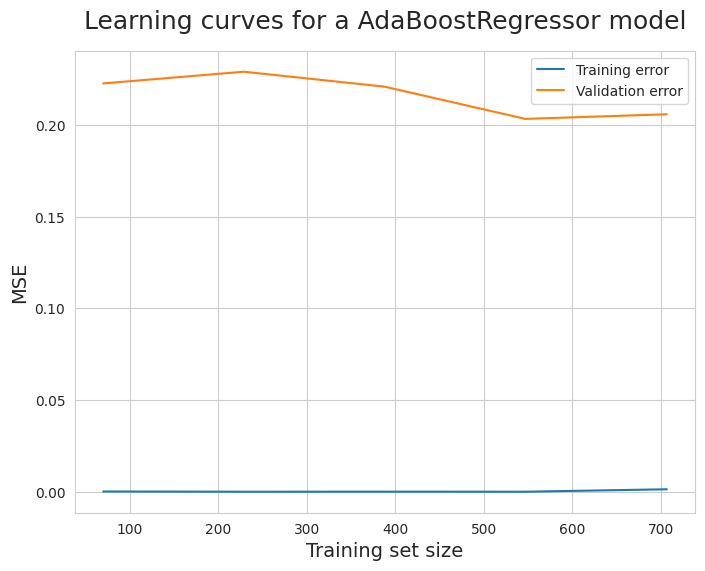

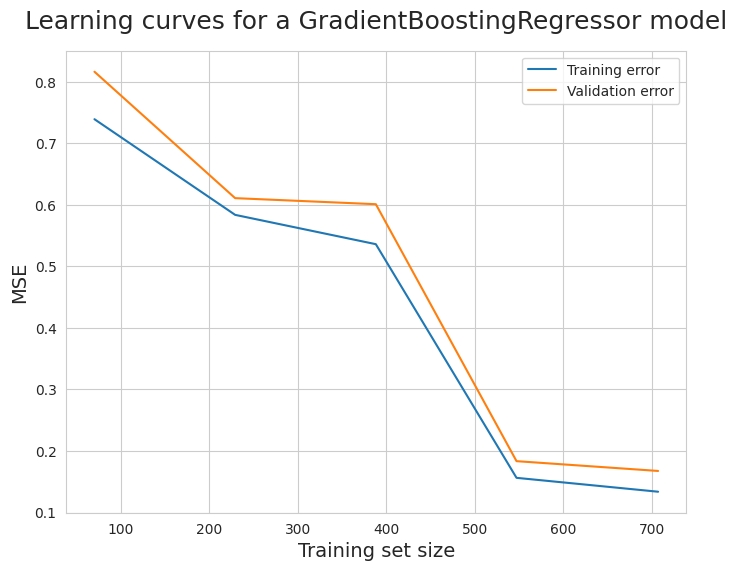

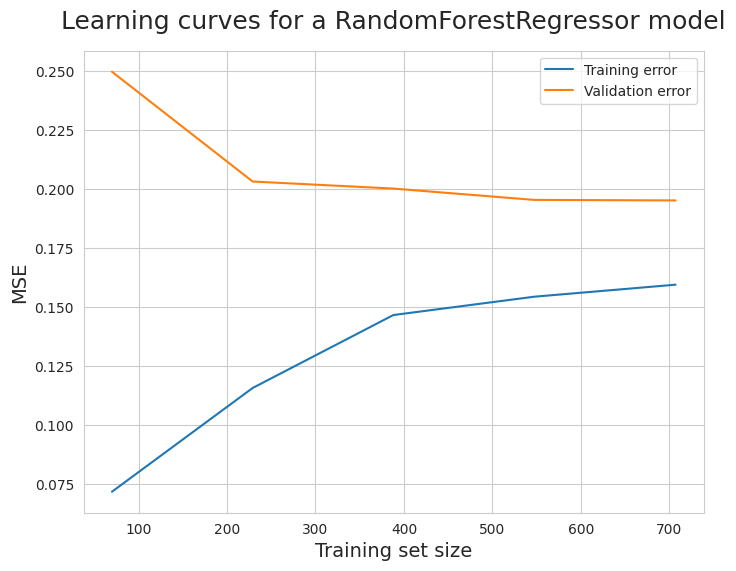

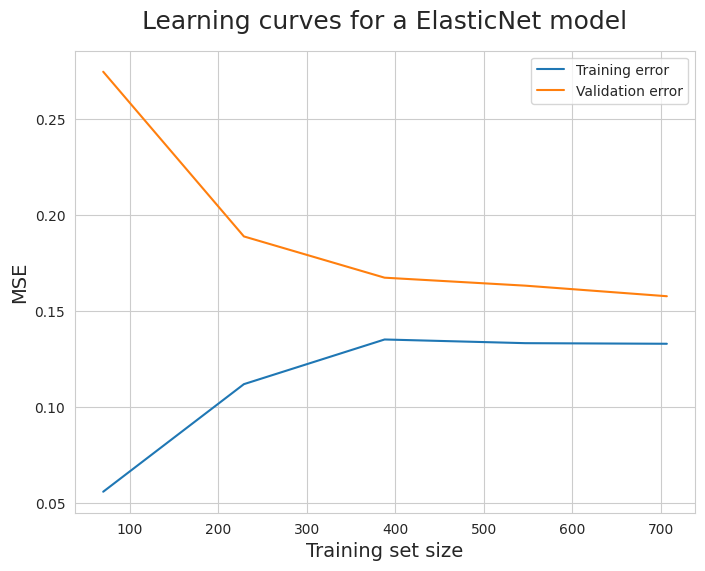

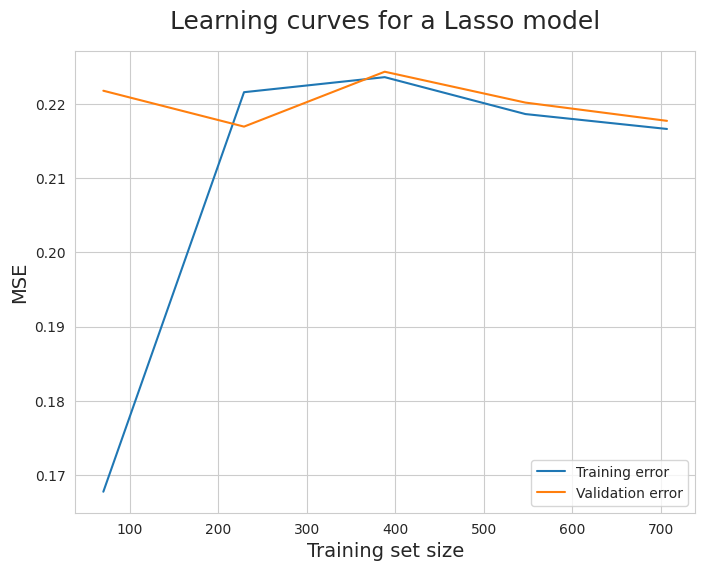

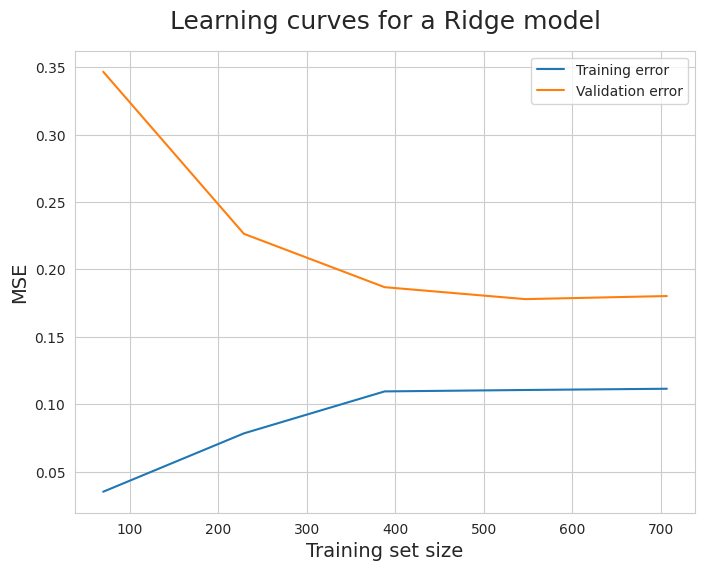

In [39]:
regressors = [ADR_best , GBR_best , RFR_best ,ElN_best ,las_best ,RD_best ]
learning_curves(regressors , X_train_poly  , y_train )

#### notes to remember when looking at the learning curves
-  There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hall‐
   mark of an overfitting model, <b> okay but how to solve it ?</b>
   One way to improve an overfitting model is to feed it more training
    data until the validation error reaches the training error.
-  if Both curves have reached a plateau and they are close and fairly high , that is  typical of a model that’s underfitting

after telling you that info and looking at these curves , which regressor you would take ?
Lasso and GradientBoosting did a good job especially GradientBoosting

In [40]:
for model in [GBR_best ,las_best ]:
    start = time()
    model.fit(X_train_poly, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test_poly)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

GradientBoostingRegressor(max_depth=8, max_features=0.1, min_samples_leaf=100)
	Training time: 0.444s
	Prediction time: 0.002s
	Explained variance: 0.8137559248636292
	Mean absolute error: 0.16152607035429456
	R2 score: 0.8136191487977709

Lasso(alpha=0.1)
	Training time: 0.030s
	Prediction time: 0.001s
	Explained variance: 0.7152119815643492
	Mean absolute error: 0.24681562305511537
	R2 score: 0.7152056890004205



In this notebook I assumed a lot of things and the last thing is that you are a amazing person and gonna make upvote and make a
nice comment 😉